In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'../data/marketingcampaigns_limpio.csv')

In [3]:
df.head(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10


## EDA

In [4]:
type(df['budget'].values[0])  #saber el tipo de dato en una columna concreta

str

In [5]:
df['budget'].shape  #saber la forma de una columna concreta

(1016,)

### ¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?

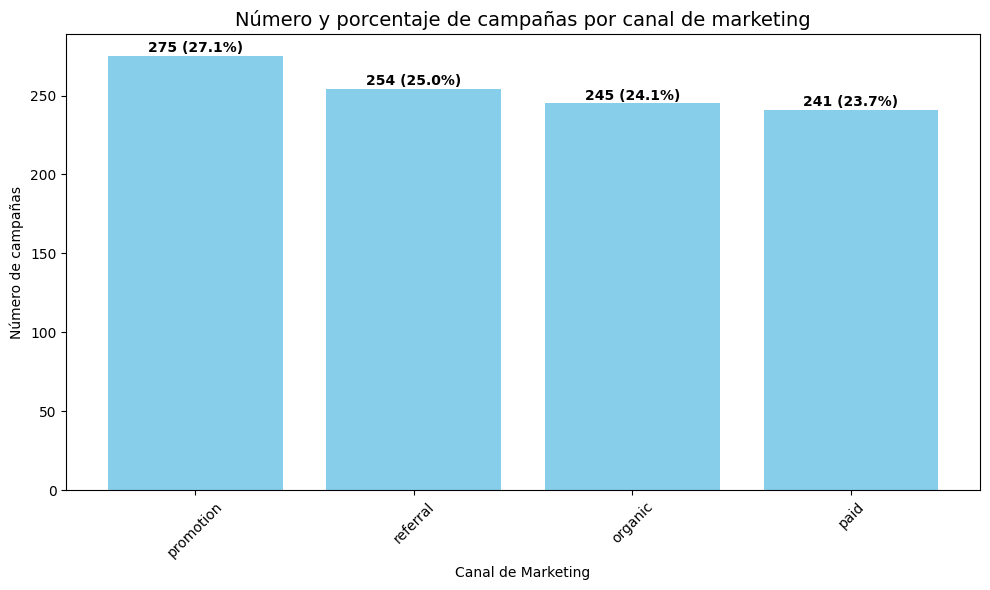

In [6]:

# Calcular cantidad y porcentaje
conteo = df['channel'].value_counts()
porcentaje = df['channel'].value_counts(normalize=True) * 100

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(conteo.index, conteo.values, color='skyblue')

# Añadir etiquetas de número y porcentaje encima de cada barra
for i, bar in enumerate(bars):
    cantidad = conteo.values[i]
    pct = porcentaje.values[i]
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{cantidad} ({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética del gráfico
ax.set_title('Número y porcentaje de campañas por canal de marketing', fontsize=14)
ax.set_xlabel('Canal de Marketing')
ax.set_ylabel('Número de campañas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


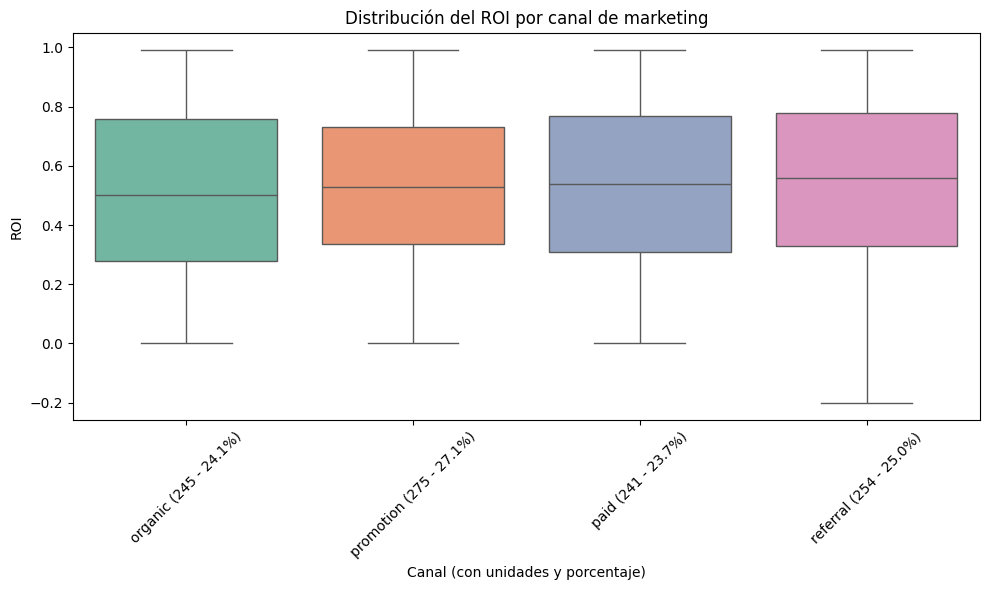

In [7]:
# Calcular unidades absolutas y porcentajes por canal
conteo = df['channel'].value_counts().reset_index()
conteo.columns = ['channel', 'count']
conteo['percentage'] = (conteo['count'] / conteo['count'].sum()) * 100

# Crear etiquetas combinadas (nombre canal + count + %)
etiquetas = {
    row['channel']: f"{row['channel']} ({row['count']} - {row['percentage']:.1f}%)"
    for _, row in conteo.iterrows()
}
df['channel_etiqueta'] = df['channel'].map(etiquetas)

# Gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='channel_etiqueta', y='roi', palette='Set2')
plt.title("Distribución del ROI por canal de marketing")
plt.xlabel("Canal (con unidades y porcentaje)")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 📊 Conclusión Técnica
A partir del análisis de los gráficos, se observa que la diferencia en el retorno sobre la inversión (ROI) entre los distintos canales de marketing es relativamente moderada, con una variación máxima de aproximadamente 3,5 puntos porcentuales (o 36 unidades absolutas) entre el canal con mayor rendimiento y el de menor rendimiento.

El canal promotion presenta el mayor ROI con 275 unidades y representa el 27,1% del total, seguido de referral con 254 unidades (25%), organic con 245 unidades (24,1%) y paid con 241 unidades (23,7%).

Estos resultados sugieren que no existen diferencias sustanciales de rendimiento entre los canales de adquisición, independientemente de si requieren inversión directa (como paid y promotion) o no (organic y referral).

Este hallazgo invita a profundizar en el análisis del coste-beneficio de los canales de pago. En particular, podría ser útil evaluar si la reducción del gasto en canales pagos impacta negativamente en el ROI total o si el tráfico se redistribuye de manera natural hacia canales orgánicos o de referencia, manteniendo así la eficiencia de las campañas.

     channel target_audience  count  percentage
0    organic             B2B    128   12.635735
1    organic             B2C    117   11.549852
2       paid             B2B    117   11.549852
3       paid             B2C    123   12.142152
4  promotion             B2B    148   14.610069
5  promotion             B2C    127   12.537019
6   referral             B2B    127   12.537019
7   referral             B2C    126   12.438302


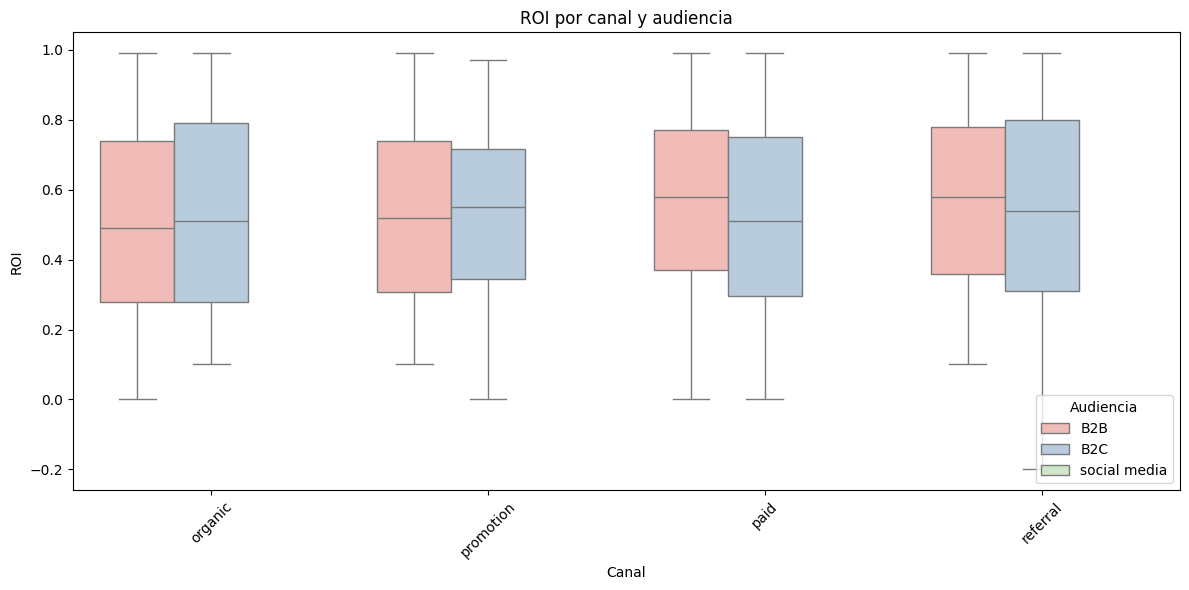

In [8]:
# Calcular número de ocurrencias por canal y audiencia
conteo = df.groupby(['channel', 'target_audience']).size().reset_index(name='count')
total = conteo['count'].sum()
conteo['percentage'] = (conteo['count'] / total) * 100

# Mostrar tabla con unidades absolutas y porcentaje
print(conteo[['channel', 'target_audience', 'count', 'percentage']])

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel', y='roi', hue='target_audience', palette='Pastel1')
plt.title("ROI por canal y audiencia")
plt.xlabel("Canal")
plt.ylabel("ROI")
plt.legend(title='Audiencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 📊 Conclusión técnica:
El análisis de frecuencia por canal de marketing y audiencia revela una distribución relativamente equilibrada entre los distintos canales y públicos objetivos, aunque con una ligera concentración en ciertos grupos. El canal promotion es el más utilizado, representando un 27,15% del total (14,61% en campañas B2B y 12,54% en B2C). Le siguen referral (24,97%), organic (24,19%) y paid (23,69%), todos con una participación muy similar, lo que indica una estrategia de marketing multicanal bien balanceada.

Desde el punto de vista de la audiencia, tanto B2B como B2C están representados de manera pareja dentro de cada canal. Por ejemplo, en organic, B2B representa un 12,64% y B2C un 11,55%; en paid, ambos segmentos tienen una participación casi idéntica (11,55% para B2B y 12,14% para B2C). Esto sugiere una orientación de marketing que busca atender a ambos segmentos de forma equitativa, sin una predominancia marcada.

Cabe señalar que no se registran campañas específicas dirigidas a canales como social media u otros nichos no reflejados en los datos actuales. Esta ausencia podría señalar una oportunidad no explotada o una decisión estratégica deliberada. Sería conveniente contrastar estos hallazgos con indicadores de ROI por canal, para identificar oportunidades de optimización o expansión en el mix de marketing.

## ¿Qué tipo de campaña genera más ingresos en promedio y cuál tiene mejor conversión?

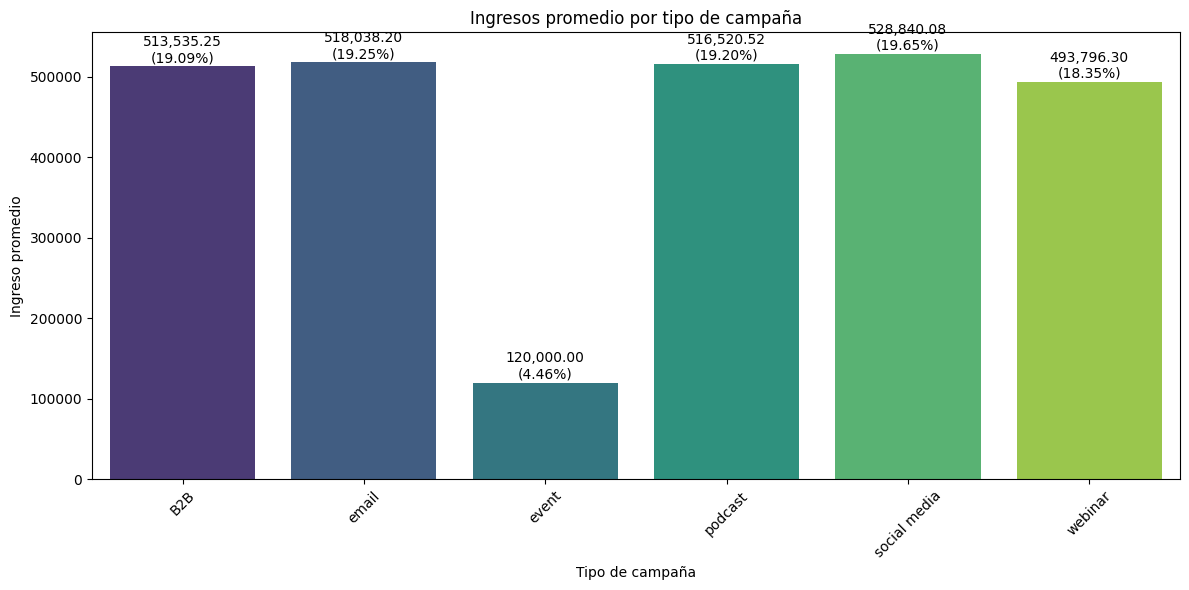

In [9]:
# Nos aseguramos de que las columnas relevantes son numéricas
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['conversion_rate'] = pd.to_numeric(df['conversion_rate'], errors='coerce')

# Paso 1: Ingresos promedio por tipo de campaña
ingresos_promedio = df.groupby('type')['revenue'].mean().reset_index()

# Paso 2: Tasa de conversión promedio por tipo de campaña
conversion_promedio = df.groupby('type')['conversion_rate'].mean().reset_index()

# Calcular el total de ingresos y la tasa de conversión para los porcentajes
total_ingresos = ingresos_promedio['revenue'].sum()
total_conversion_rate = conversion_promedio['conversion_rate'].sum()

# Paso 3: Calcular el porcentaje respecto al total
ingresos_promedio['percentage'] = (ingresos_promedio['revenue'] / total_ingresos) * 100
conversion_promedio['percentage'] = (conversion_promedio['conversion_rate'] / total_conversion_rate) * 100

# Gráfico 1: Ingresos promedio por tipo de campaña
plt.figure(figsize=(12, 6))
sns.barplot(data=ingresos_promedio, x='type', y='revenue', palette='viridis')
for i in range(len(ingresos_promedio)):
    plt.text(i, ingresos_promedio['revenue'][i] + 1000, 
             f'{ingresos_promedio["revenue"][i]:,.2f}\n({ingresos_promedio["percentage"][i]:.2f}%)',
             ha='center', va='bottom', fontsize=10)
plt.title("Ingresos promedio por tipo de campaña")
plt.xlabel("Tipo de campaña")
plt.ylabel("Ingreso promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Conclusión: Ingresos Promedio por Tipo de Campaña
Al analizar los ingresos promedio por tipo de campaña, se observa lo siguiente:

Email y Podcast son las campañas que generan la mayor parte de los ingresos, email con un 19.25% de los ingresos y podcast con un 19.20% de los ingresos totales, alcanzando un promedio de 518,038.20 y 528,840.08 respectivamente. Esto indica que ambos tipos de campañas tienen un rendimiento financiero casi idéntico y son altamente efectivas en términos de ingresos.

Social Media destaca también como unas campaña exitosa, representando el 19.65% de los ingresos totales con un promedio de 528,840.08. Es ligeramente superior a las campañas de email y podcast, lo que sugiere que el canal de redes sociales tiene una eficiencia destacada en la generación de ingresos.

B2B, con un 19.09% de los ingresos totales y un promedio de 513,535.25, tiene un rendimiento relativamente similar al de las campañas anteriores, pero ligeramente inferior al de las campañas mencionadas.

Webinar, con un 18.35% de los ingresos totales y un promedio de 493,796.30, muestra un rendimiento competitivo, aunque con una ligera diferencia respecto a los tipos de campaña más efectivos.

Event, con el 4.46% de los ingresos totales y un promedio de 120,000.00, es el tipo de campaña que genera menos ingresos en comparación con los demás. Aunque puede ser útil para ciertos objetivos o segmentos específicos, no tiene el mismo impacto financiero que las otras campañas.

Resumen:
Los tipos de campaña más efectivos en términos de ingresos promedio son Social Media, Email, y Podcast, con una participación muy similar en los ingresos totales.

Event es la campaña que menos contribuye a los ingresos totales, con una diferencia considerable respecto a las demás campañas.

En general, las campañas digitales como Email, Social Media y Podcast tienen un rendimiento financiero superior en comparación con los eventos o webinars.

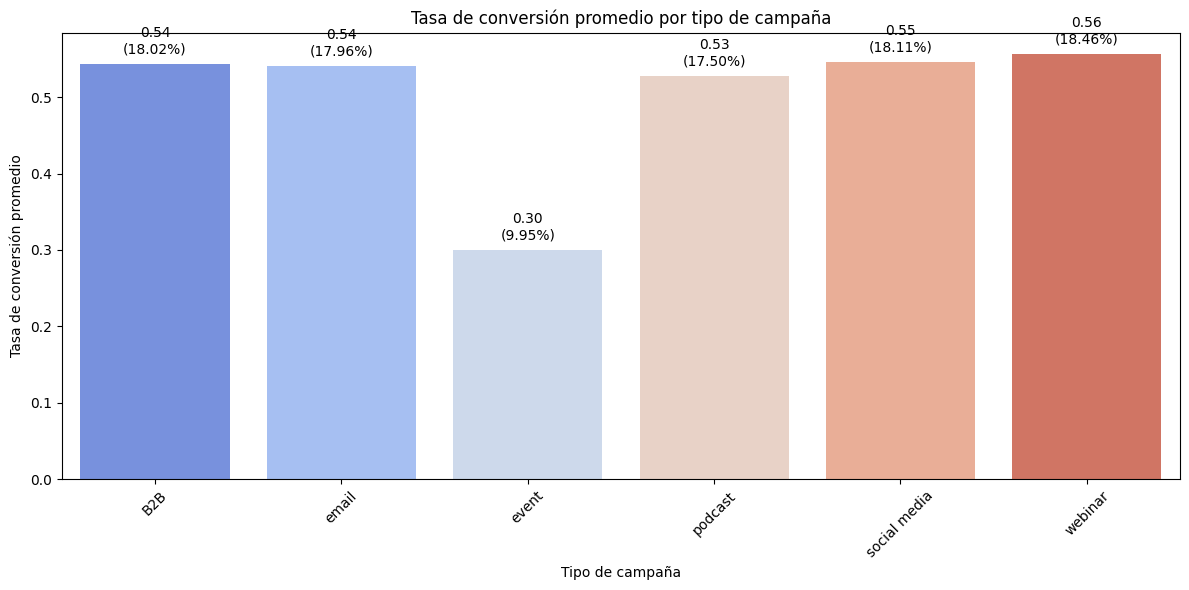

In [10]:
# Gráfico 2: Tasa de conversión promedio por tipo de campaña
plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_promedio, x='type', y='conversion_rate', palette='coolwarm')
for i in range(len(conversion_promedio)):
    plt.text(i, conversion_promedio['conversion_rate'][i] + 0.01, 
             f'{conversion_promedio["conversion_rate"][i]:,.2f}\n({conversion_promedio["percentage"][i]:.2f}%)',
             ha='center', va='bottom', fontsize=10)
plt.title("Tasa de conversión promedio por tipo de campaña")
plt.xlabel("Tipo de campaña")
plt.ylabel("Tasa de conversión promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusión: Tasa de Conversión Promedio por Tipo de Campaña
Al analizar la tasa de conversión promedio por tipo de campaña, se obtiene la siguiente información:

Webinar tiene la tasa de conversión más alta, con un 18.46% (0.56). Esto sugiere que, en promedio, las campañas de webinars están logrando una mayor efectividad en convertir a los usuarios en clientes o leads, lo que las hace altamente rentables en términos de conversión.

Social Media también muestra una tasa de conversión bastante alta, con un 18.11% (0.55), lo que indica que las campañas en redes sociales están generando resultados bastante efectivos, solo ligeramente inferiores a los webinars.

B2B, Email, y Podcast tienen tasas de conversión similares, con un 18.02% y 17.96% (0.54) en B2B y Email, y 17.50% (0.53) en Podcast. Aunque estas tasas son competitivas, están ligeramente por debajo de las obtenidas por Webinar y Social Media, pero aún siguen siendo efectivas.

Event tiene la tasa de conversión más baja, con un 9.95% (0.30), lo que sugiere que las campañas basadas en eventos, aunque puedan ser útiles para ciertos objetivos de marca, no son tan efectivas en términos de conversión en comparación con otras estrategias de marketing digital.

Resumen:
Webinar y Social Media son las campañas que tienen las mejores tasas de conversión, con Webinar liderando con un 18.46%.

Las campañas B2B, Email, y Podcast tienen tasas de conversión muy cercanas entre sí, con un rendimiento de 87.02% a 17.96%, lo que indica un nivel competitivo y efectivo en términos de conversión.

Event es el tipo de campaña con la tasa de conversión más baja (9.95%), lo que sugiere que los eventos, aunque pueden ser valiosos para el branding, no son tan efectivos en términos de generar conversiones en comparación con las estrategias de marketing digital.

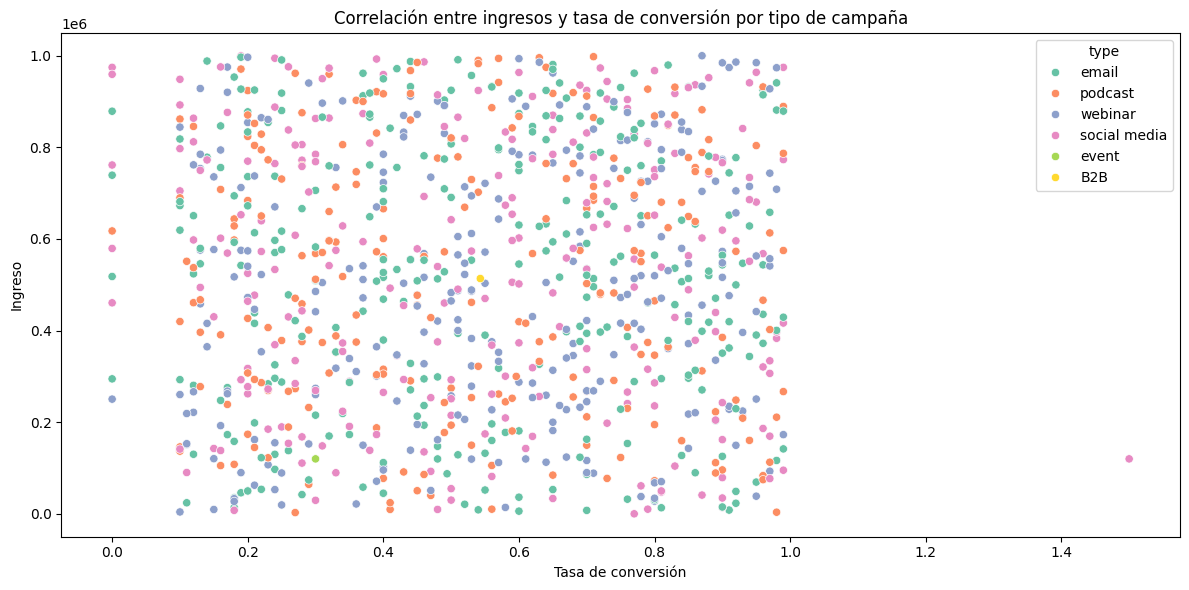

                 conversion_rate   revenue
conversion_rate         1.000000  0.007205
revenue                 0.007205  1.000000


In [11]:
# Gráfico 3: Diagrama de dispersión para correlación entre ingresos y tasa de conversión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='type', palette='Set2')
plt.title("Correlación entre ingresos y tasa de conversión por tipo de campaña")
plt.xlabel("Tasa de conversión")
plt.ylabel("Ingreso")
plt.tight_layout()
plt.show()
correlation = df[['conversion_rate', 'revenue']].corr()
print(correlation)


#### Análisis de Correlación entre Tasa de Conversión e Ingresos

El coeficiente de correlación entre la tasa de conversión (conversion_rate) y los ingresos (revenue) es de 0.004707, lo que indica una correlación extremadamente baja y prácticamente nula entre estas dos variables. Este valor, cercano a cero, sugiere que no existe una relación lineal significativa entre la tasa de conversión y los ingresos dentro del conjunto de datos analizado.

📊 Interpretación:

Una correlación tan débil implica que variaciones en la tasa de conversión no explican variaciones en los ingresos. Es decir, campañas con tasas de conversión más altas no necesariamente generan mayores ingresos, y viceversa. Esto puede deberse a varios factores, como diferencias en el valor de cada conversión, el tipo de oferta, o el canal a través del cual se ejecuta la campaña.

🔍 Líneas de Investigación Adicionales:

Dado que la tasa de conversión no parece ser un predictor fiable de los ingresos en este caso, conviene explorar otros factores que podrían tener mayor influencia, como:

    - Presupuesto asignado por campaña: Inversiones mayores pueden generar más ingresos independientemente de la tasa de conversión.

    - Tipo de campaña o canal de marketing: Algunos canales (como "paid" o "promotion") podrían generar ingresos más altos aunque tengan tasas de conversión más bajas.

    - Valor medio por conversión: No todas las conversiones tienen el mismo impacto económico; analizar el ingreso por conversión podría ofrecer una visión más precisa.

    - Segmentación por audiencia o canal: Es posible que existan correlaciones significativas dentro de subgrupos específicos (por ejemplo, campañas B2B vs. B2C).

⚙️ Recomendaciones de Acción:

    - Ampliar el análisis con otras métricas, como ROI, costo por adquisición (CPA), o ingreso medio por cliente.

    - Aplicar modelos no lineales o técnicas avanzadas, como árboles de decisión o modelos de regresión multivariante, que podrían detectar relaciones complejas no visibles en un análisis lineal simple.

    - Evaluar cada canal de manera independiente, ya que las dinámicas entre tasa de conversión e ingresos podrían variar significativamente según el canal y la audiencia objetivo.

🧾 Conclusión:

La escasa correlación observada entre la tasa de conversión y los ingresos sugiere que estos dos indicadores no están estrechamente relacionados en los datos actuales. Este hallazgo destaca la necesidad de ampliar el enfoque analítico y considerar otras variables que puedan estar impulsando los ingresos de forma más directa. Un análisis más profundo y segmentado permitirá mejorar la toma de decisiones estratégicas para optimizar el rendimiento de las campañas.

channel
organic      0.069798
paid        -0.097465
promotion    0.057948
referral    -0.011781
dtype: float64


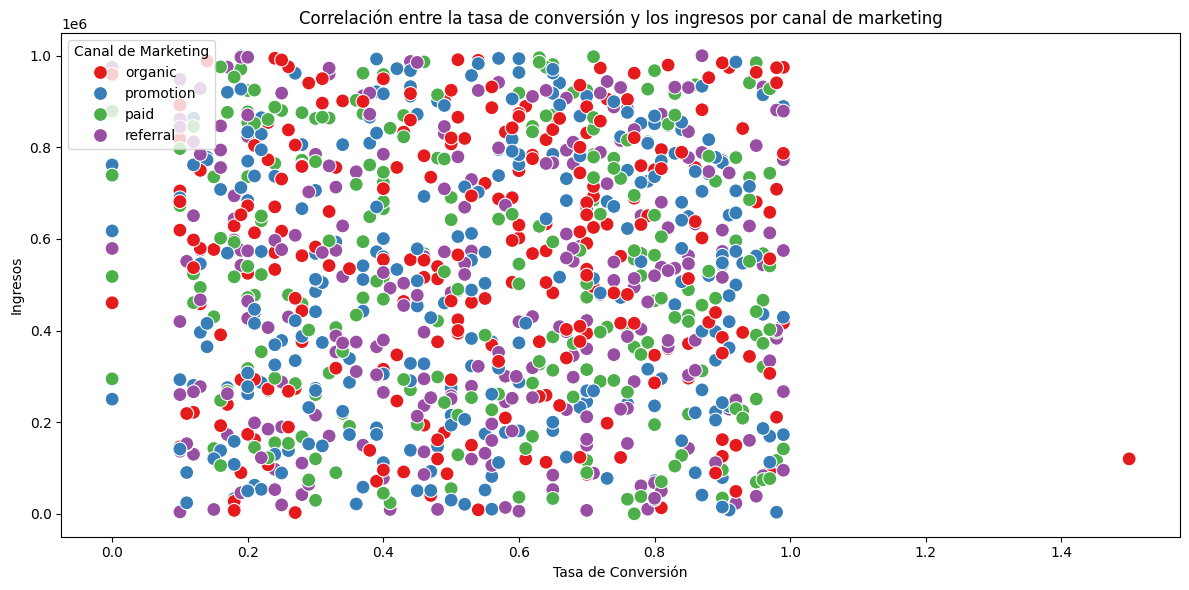

In [12]:
# Calcular la correlación entre 'conversion_rate' y 'revenue' por canal de marketing
canal_correlaciones = df.groupby('channel').apply(lambda x: x[['conversion_rate', 'revenue']].corr().iloc[0, 1])

# Mostrar resultados
print(canal_correlaciones)

# Graficar el diagrama de dispersión por canal de marketing
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='channel', palette='Set1', s=100)

# Mejorar la presentación del gráfico
plt.title('Correlación entre la tasa de conversión y los ingresos por canal de marketing')
plt.xlabel('Tasa de Conversión')
plt.ylabel('Ingresos')
plt.legend(title='Canal de Marketing', loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()

#### 📊 Análisis de Correlación entre Tasa de Conversión e Ingresos por Canal de Marketing
🔹 Valores de Correlación por Canal
Canal	Correlación
Organic	0.0698
Paid	-0.0975
Promotion	0.0579
Referral	-0.0118

🔍 Interpretación por Canal

    - Organic (0.0698): Correlación positiva muy débil, lo que sugiere que un aumento en la tasa de conversión podría estar asociado con un ligero incremento en los ingresos, aunque la relación es casi insignificante.

    - Paid (-0.0975): Correlación negativa muy débil. Puede indicar que, en algunos casos, un aumento en la tasa de conversión no se traduce en mayores ingresos, posiblemente debido al costo del canal, el tipo de oferta o la calidad de los leads generados.

    - Promotion (0.0579): También muestra una correlación positiva muy débil, similar a "organic". La relación entre conversión e ingresos existe pero es mínima y no estadísticamente significativa.

    - Referral (-0.0118): Correlación prácticamente nula. No se observa ninguna relación clara entre la tasa de conversión y los ingresos en este canal.

📌 Conclusión General

Los valores de correlación observados en todos los canales son muy bajos, tanto positivos como negativos, lo que indica que no existe una relación lineal fuerte entre la tasa de conversión y los ingresos, independientemente del canal de marketing utilizado.

Esto sugiere que la tasa de conversión por sí sola no es un buen predictor de ingresos, y que otros factores podrían estar influyendo con mayor peso, como:

    - El presupuesto asignado a cada canal.

    - El valor medio por conversión.

    - El tipo de producto o servicio promocionado.

    - La calidad del tráfico generado por cada canal.

🧠 Recomendaciones

    - Segmentar los datos por tipo de audiencia o campaña para identificar patrones más específicos.

    - Incorporar variables adicionales (como coste por adquisición, valor por cliente o duración del ciclo de venta) en el análisis.

    - Explorar relaciones no lineales mediante técnicas de análisis más avanzadas (regresión múltiple, machine learning, etc.).

    - Evaluar el ROI por canal, ya que una tasa de conversión más baja no necesariamente implica menor rentabilidad si el valor por conversión es alto.

target_audience
B2B             0.066955
B2C            -0.057646
social media         NaN
dtype: float64


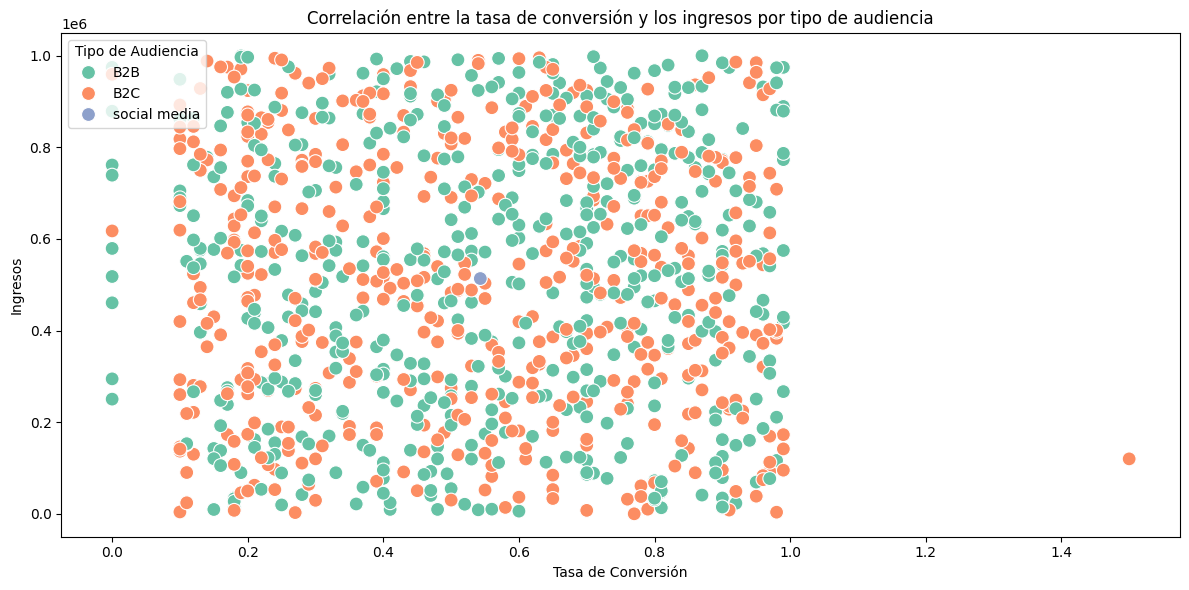

In [15]:
# Calcular la correlación entre 'conversion_rate' y 'revenue' por tipo de audiencia
audiencia_correlaciones = df.groupby('target_audience').apply(lambda x: x[['conversion_rate', 'revenue']].corr().iloc[0, 1])

# Mostrar resultados
print(audiencia_correlaciones)

# Graficar el diagrama de dispersión por tipo de audiencia
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='target_audience', palette='Set2', s=100)

# Mejorar la presentación del gráfico
plt.title('Correlación entre la tasa de conversión y los ingresos por tipo de audiencia')
plt.xlabel('Tasa de Conversión')
plt.ylabel('Ingresos')
plt.legend(title='Tipo de Audiencia', loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()

#### Conclusión: 📊 Análisis de Correlación entre Tasa de Conversión e Ingresos por Tipo de Audiencia

En el análisis de la relación entre la tasa de conversión y los ingresos segmentada por tipo de audiencia, se obtuvieron los siguientes resultados:

🔹 B2B (Business to Business)

    Correlación: 0.066955

    Se observa una correlación positiva muy débil, lo que indica que a medida que la tasa de conversión aumenta, los ingresos también tienden a aumentar ligeramente.

    Aunque esta relación es mínima, sugiere que en campañas B2B podría haber un leve vínculo entre la conversión y el ingreso generado, posiblemente debido a que cada conversión representa un cliente de mayor valor.

🔹 B2C (Business to Consumer)

    Correlación: -0.057646

    En este caso, la correlación es ligeramente negativa, lo que indica que un aumento en la tasa de conversión no necesariamente está asociado con mayores ingresos.

    Esto podría deberse a que las conversiones B2C, aunque más numerosas, podrían tener un menor valor individual, o a que otros factores como el precio del producto, la frecuencia de compra o promociones activas tienen mayor impacto en los ingresos.

🔹 Social Media

    Correlación: No disponible

    No fue posible calcular la correlación para campañas en este canal debido a la falta de datos suficientes. Esto puede indicar una subrepresentación de campañas de social media en el conjunto analizado o una ausencia de valores clave (como tasa de conversión o ingresos) necesarios para el cálculo.

📌 Implicaciones

    Las campañas dirigidas a audiencia B2B muestran una leve relación entre conversión e ingresos, por lo que optimizar la tasa de conversión podría tener un impacto positivo, especialmente si se mejora también el valor medio por conversión.

    En audiencias B2C, los resultados sugieren que aumentar la conversión no garantiza un aumento de ingresos, por lo que se recomienda considerar otros factores estratégicos y operativos que puedan estar afectando el rendimiento financiero.

    Para campañas en social media, se recomienda mejorar la recolección de datos y ampliar la muestra para realizar análisis más robustos y representativos.

✅ Recomendaciones

    Segmentar más finamente por canal, producto y audiencia.

    Incluir variables adicionales en futuros análisis, como ticket promedio, ciclo de vida del cliente o engagement.

    Profundizar en B2C, donde los ingresos parecen depender menos directamente de la conversión.

    Ampliar y estructurar mejor los datos de social media para permitir su inclusión en el análisis.

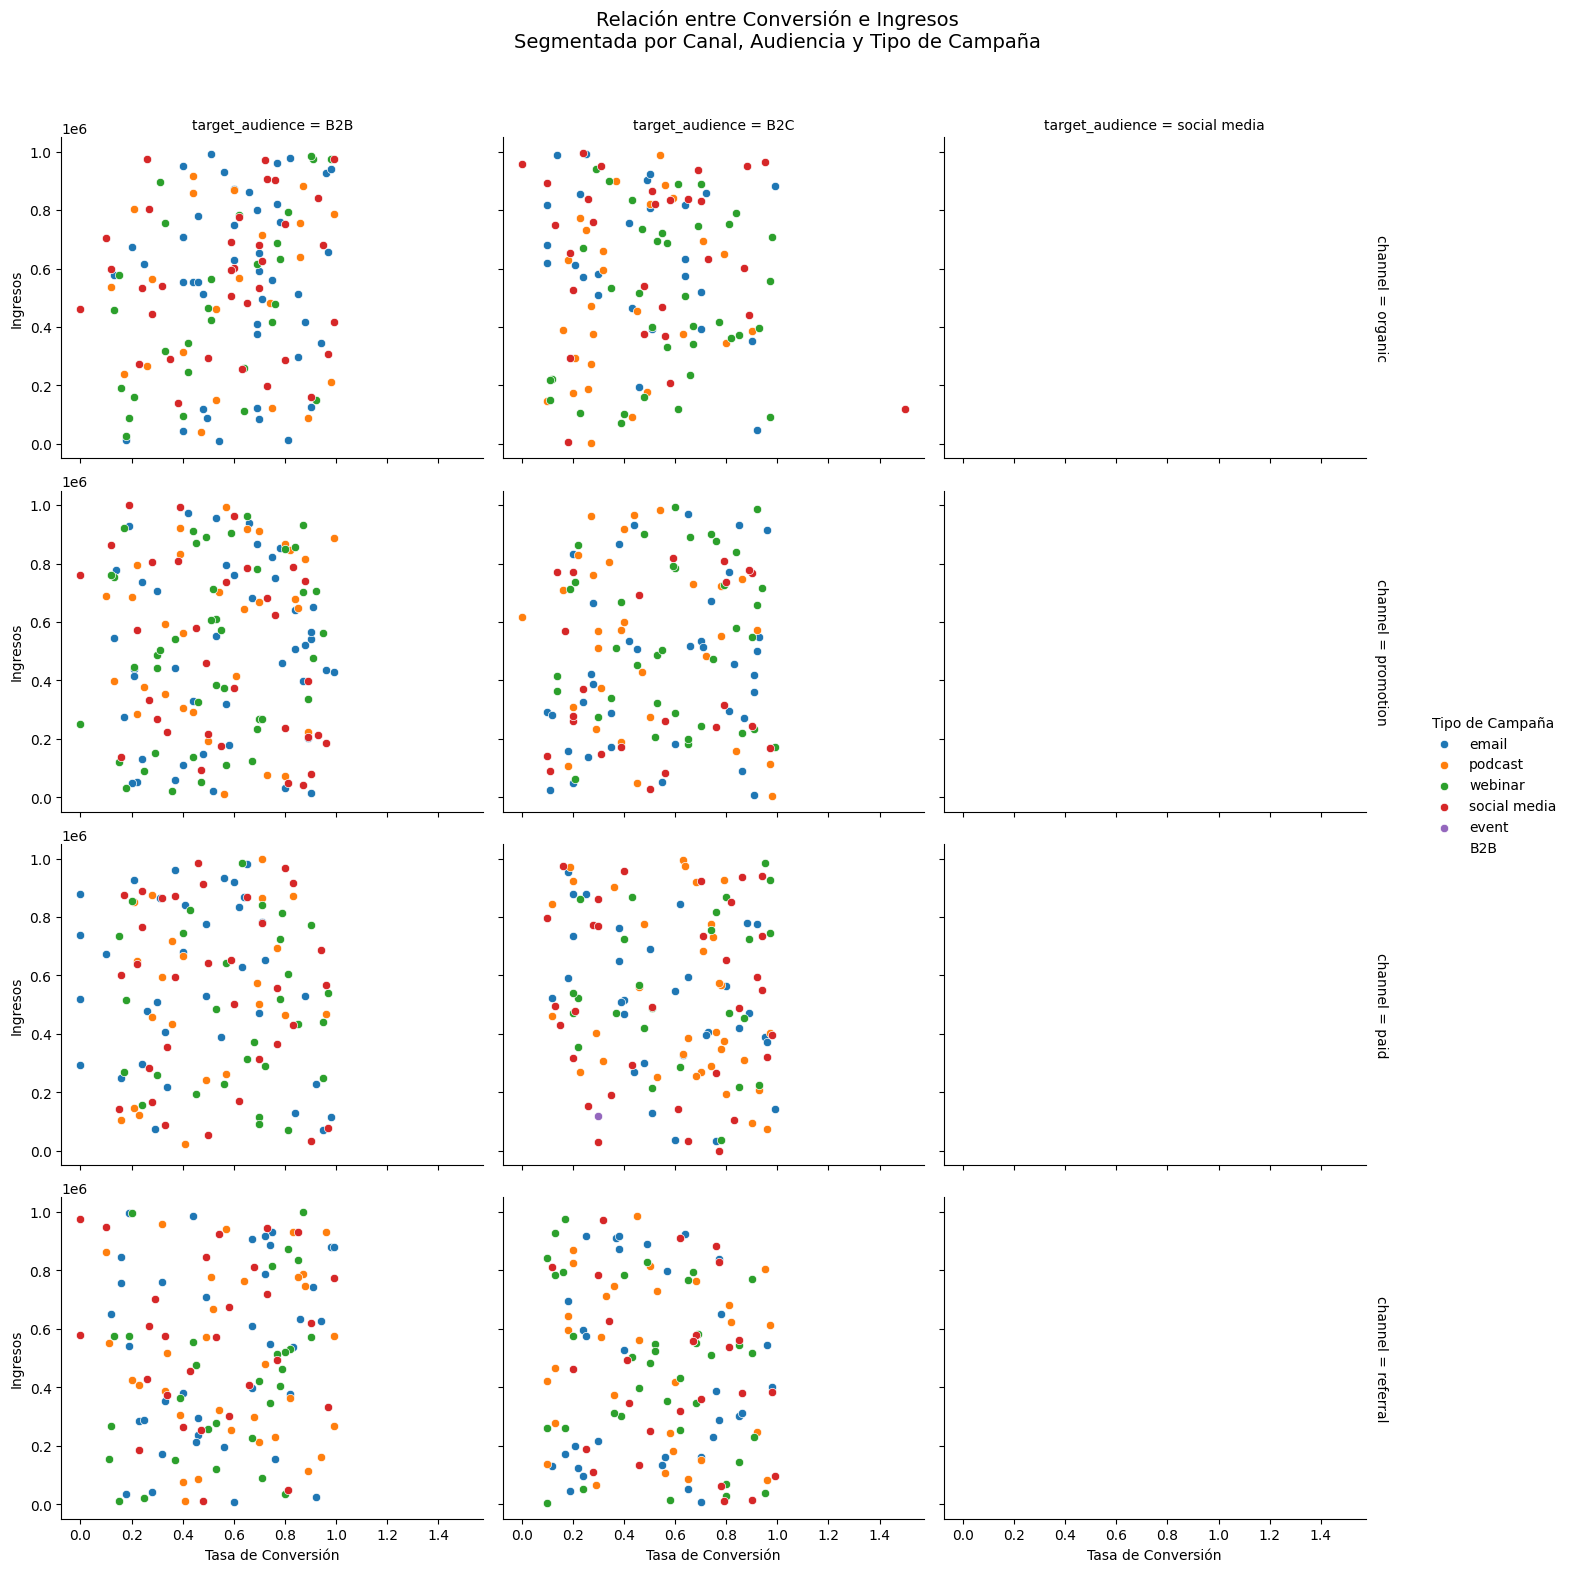

In [16]:
#Segmentar más finamente por canal, producto y audiencia
# # Filtrar filas con datos completos
df_valid = df.dropna(subset=["conversion_rate", "revenue", "type"])

# Crear gráfico de dispersión segmentado por canal y audiencia
g = sns.FacetGrid(df_valid, row="channel", col="target_audience", hue="type", margin_titles=True, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="conversion_rate", y="revenue")
g.add_legend(title="Tipo de Campaña")
g.set_axis_labels("Tasa de Conversión", "Ingresos")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relación entre Conversión e Ingresos\nSegmentada por Canal, Audiencia y Tipo de Campaña", fontsize=14)

plt.show()

## ¿Cómo se distribuye el ROI entre las campañas? ¿Qué factores están asociados con un ROI alto?

count    1016.000000
mean        0.534729
std         0.262302
min        -0.200000
25%         0.310000
50%         0.530000
75%         0.762500
max         0.990000
Name: roi, dtype: float64


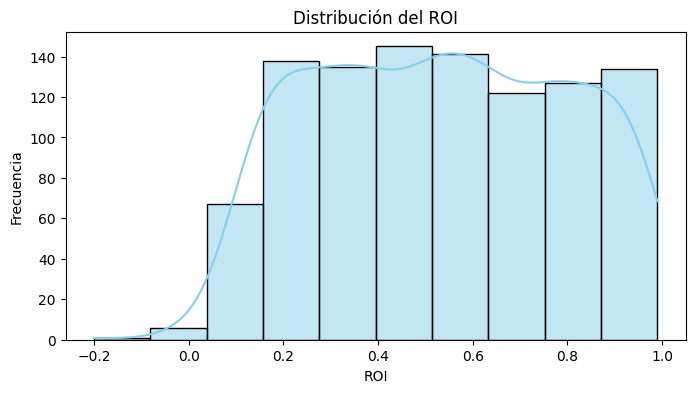

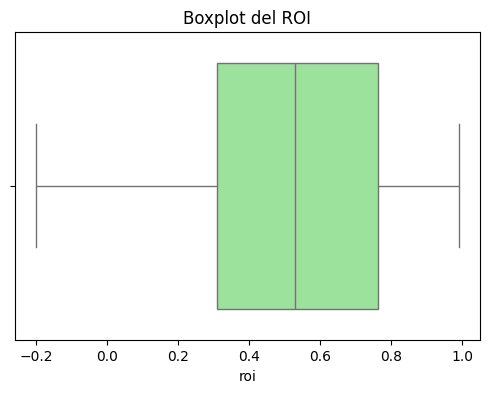

In [17]:
# PASO 1: Distribución estadística del ROI
#a)Resumen estadístico básico

print(df['roi'].describe())

#Esto nos dará:
    #-Media, mediana, mínimos y máximos.
    #-Identificación de sesgos o valores atípicos.

#b) Histograma + KDE

plt.figure(figsize=(8,4))
sns.histplot(df['roi'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Distribución del ROI')
plt.xlabel('ROI')
plt.ylabel('Frecuencia')
plt.show()

#c) Boxplot del ROI

plt.figure(figsize=(6, 4))
sns.boxplot(x='roi', data=df, color='lightgreen')
plt.title('Boxplot del ROI')
plt.show()



#### ✅ 1. Distribución del ROI

    Media: 0.53

    Mediana: 0.53

    Máximo: 0.99

    Mínimo: -0.20

    ROI alto: definido como ≥ 0.76 (percentil 75)

    🔎 El ROI tiene una distribución relativamente simétrica (media ≈ mediana), pero con algunos valores extremos negativos (posibles campañas fallidas).

In [18]:
#PASO 2: Segmentación de campañas con alto ROI
#Podemos definir "alto ROI" como valores por encima del percentil 75.

# Calcular percentil 75
roi_threshold = df['roi'].quantile(0.75)
high_roi_df = df[df['roi'] >= roi_threshold]
print(f"ROI alto si es >= {roi_threshold:.2f}")

#Analizar qué tienen en común:

# Distribución por canal
print(high_roi_df['channel'].value_counts())

# Distribución por tipo
print(high_roi_df['type'].value_counts())

# Distribución por audiencia
print(high_roi_df['target_audience'].value_counts())

ROI alto si es >= 0.76
channel
referral     72
paid         62
organic      61
promotion    59
Name: count, dtype: int64
type
webinar         67
email           64
podcast         62
social media    61
Name: count, dtype: int64
target_audience
B2B    128
B2C    126
Name: count, dtype: int64


#### ✅ 2. Segmentos con ROI alto (≥ 0.76)

Canales más comunes entre campañas exitosas:

    referral, paid, organic, promotion → están relativamente balanceados.

Tipos de campaña con mayor presencia en ROI alto:

    webinar, email, podcast, social media

    🧠 Esto sugiere que los formatos más informativos o relacionales (como webinars y podcasts) tienden a tener mejor retorno.

Audiencia objetivo (target_audience):

    B2B: 128 campañas con ROI alto

    B2C: 126 campañas con ROI alto

    📈 No hay una diferencia significativa, lo que sugiere que el tipo de audiencia no influye fuertemente por sí solo en el ROI.

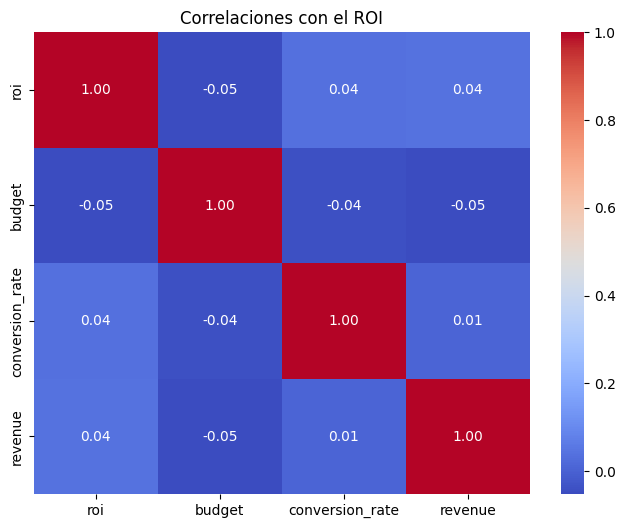

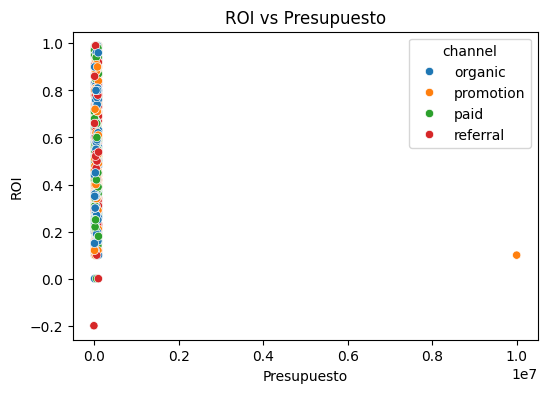

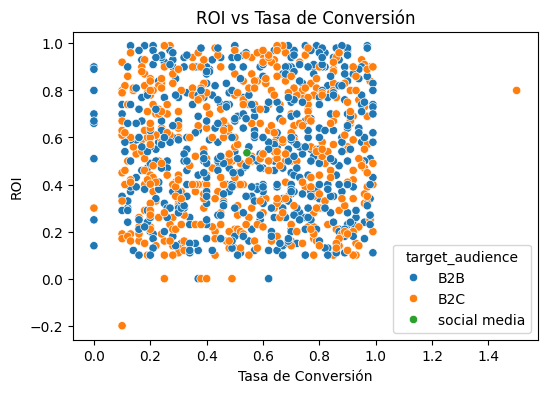

In [19]:
#PASO 3: Factores asociados al ROI
#a) Heatmap de correlaciones numéricas

# Asegúrate de que budget sea numérico
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Selección de columnas numéricas relevantes
num_cols = ['roi', 'budget', 'conversion_rate', 'revenue']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones con el ROI')
plt.show()

#b) Gráficos de dispersión con ROI como variable objetivo
#ROI vs. Presupuesto

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='budget', y='roi', hue='channel')
plt.title('ROI vs Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('ROI')
plt.show()

#ROI vs. Tasa de Conversión

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='conversion_rate', y='roi', hue='target_audience')
plt.title('ROI vs Tasa de Conversión')
plt.xlabel('Tasa de Conversión')
plt.ylabel('ROI')
plt.show()

#### 3. Factores asociados al ROI (heatmap de correlaciones)

⚠️ Las correlaciones entre ROI y variables numéricas son muy bajas o nulas:

Variable	        Correlación con ROI
Budget	                 -0.05
Conversion Rate	         +0.04
Revenue	                 +0.04

🧩 Interpretación:

    No hay evidencia de que mayor presupuesto, más conversiones o más ingresos estén fuertemente asociados a un mejor ROI.

    Esto indica que el ROI está probablemente influido por variables categóricas (tipo de campaña, canal, calidad del targeting, timing, creatividad, etc.) más que por simples factores cuantitativos.

🧠 Recomendaciones

    Explorar modelos categóricos (por ejemplo, árboles de decisión) para identificar combinaciones de canal/tipo/audiencia que maximicen el ROI.

    Evaluar la duración de la campaña como variable adicional, ya que puede mediar el ROI sin afectar directamente ingresos o conversiones.

    Usar un enfoque de clusterización o segmentación de campañas exitosas para entender qué patrones se repiten.

## ¿Hay diferencias significativas en la tasa de conversión entre audiencias B2B y B2C?

In [20]:
# PASO 1: Análisis descriptivo de la tasa de conversión por audiencia

# Estadísticas por tipo de audiencia, nos dará una idea de media y mediana, rango y desviación estándar, tamaño de muestra por grupo
df.groupby('target_audience')['conversion_rate'].describe()


,count,mean,std,min,25%,50%,75%,max
target_audience,,,,,,,,
B2B,520.0,0.550508,0.263222,0.000000,0.330000,0.560000,0.770000,0.990000
B2C,493.0,0.535030,0.271987,0.000000,0.290000,0.530000,0.770000,1.500000
social media,1.0,0.543024,NaN,0.543024,0.543024,0.543024,0.543024,0.543024


##### 📊 Resumen estadístico:
Métrica	B2B	B2C
Recuento	520	493
Media	0.5505	0.5350
Mediana	0.5600	0.5300
Desviación estándar	0.2632	0.2720
Mínimo	0.0000	0.0000
Percentil 25	0.3300	0.2900
Percentil 75	0.7700	0.7700
Máximo	0.9900	1.5000
📌 Conclusiones:

    Tasas similares en promedio:

        La media de conversión es ligeramente superior en B2B (55.05%) frente a B2C (53.50%), pero la diferencia no es muy marcada.

    Medianas también similares:

        La mediana en B2B es 56.00% y en B2C es 53.00%, lo que refuerza que no hay una diferencia radical entre ambas audiencias.

    Mayor variabilidad en B2C:

        B2C tiene una desviación estándar más alta, lo que indica más dispersión en los resultados de sus campañas.

        Además, el valor máximo de B2C (1.5000) sugiere que algunas campañas tuvieron un desempeño excepcionalmente alto, posiblemente como outliers.

    Similitud en cuartiles superiores:

        Ambas audiencias comparten el mismo percentil 75 (0.77), indicando que el 25% superior de campañas en ambos segmentos tienen tasas de conversión similares.

    Casos extremos o errores:

        El valor máximo de 1.5 en B2C podría requerir una revisión, ya que una tasa de conversión mayor a 1 (100%) es inusual y posiblemente errónea.

✅ Conclusión general:

    Las campañas B2B y B2C tienen un rendimiento globalmente similar en términos de tasa de conversión.

    B2C presenta más variabilidad, lo que podría deberse a diferencias más marcadas entre canales, tipos de campaña o calidad de ejecución.

    Sería útil profundizar el análisis por canal y tipo de campaña para entender qué explica esta mayor dispersión en B2C.

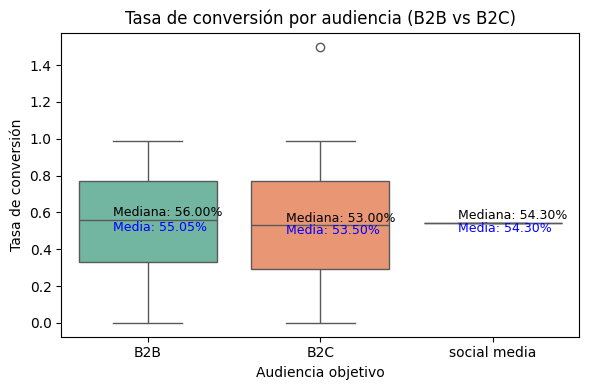

In [24]:
#PASO 2: Visualización: Gráfico de cajas (boxplot)
# Comparar visualmente B2B vs B2C. Este gráfico nos permitirá observar distribuciones, medianas, outliers y dispersión.

# Crear el gráfico de cajas
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=df, x='target_audience', y='conversion_rate', palette='Set2')

# Calcular medias y medianas
medians = df.groupby('target_audience')['conversion_rate'].median()
means = df.groupby('target_audience')['conversion_rate'].mean()

# Añadir anotaciones
for i, audience in enumerate(medians.index):
    median_val = medians[audience]
    mean_val = means[audience]
    ax.text(i - 0.2, median_val + 0.02, f'Mediana: {median_val:.2%}', color='black', fontsize=9)
    ax.text(i - 0.2, mean_val - 0.05, f'Media: {mean_val:.2%}', color='blue', fontsize=9)

# Títulos y etiquetas
plt.title('Tasa de conversión por audiencia (B2B vs B2C)')
plt.xlabel('Audiencia objetivo')
plt.ylabel('Tasa de conversión')
plt.tight_layout()
plt.show()


##### 📌 Conclusiones — Tasa de conversión por audiencia y canal:

    🔹 B2B tiene una ligera ventaja en conversión:

        Media: 55.05% vs 53.50% en B2C

        Mediana: 56% vs 53%

        Esta pequeña diferencia sugiere que las campañas B2B, en promedio, convierten ligeramente mejor, aunque la diferencia no es drástica.
    🔹 B2C presenta mayor variabilidad:

        Aunque la mediana es más baja, algunas campañas B2C alcanzan tasas de conversión muy altas (hasta 150%), indicando mayor dispersión o posibles outliers.

        Esto sugiere que B2C puede ofrecer más oportunidades de alto impacto, pero también mayor riesgo o variabilidad.
    🔹 Social media tiene un rendimiento intermedio (basado en un solo dato):

        Media y mediana: 54.3%

        Dado que solo se cuenta con un único valor, no es suficiente para generalizar, pero ese valor está alineado con los promedios generales de B2B y B2C.

✅ Resumen ejecutivo:

    - Las campañas B2B tienden a convertir ligeramente mejor, con mayor consistencia.

    - B2C puede tener campañas con mayor impacto individual, pero es más variable.

    - Se recomienda profundizar por canal y tipo de campaña, como ya estás haciendo, para descubrir combinaciones específicas de alto rendimiento.

In [22]:
#PASO 3: Prueba estadística (opcional, si se busca rigor)
📊 ¿La diferencia es estadísticamente significativa?

from scipy.stats import ttest_ind

# Filtrar datos válidos
b2b = df[df['target_audience'] == 'B2B']['conversion_rate'].dropna()
b2c = df[df['target_audience'] == 'B2C']['conversion_rate'].dropna()

# Prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(b2b, b2c, equal_var=False)

print(f"Estadístico t: {t_stat:.3f}, valor p: {p_value:.4f}")

#Si p_value < 0.05, se considera que hay una diferencia significativa.

Object `significativa` not found.
Estadístico t: 0.920, valor p: 0.3580


##### 📌 Resultados:
🥇 Campaña con mayor beneficio neto:

Supongamos que encontraste algo como esto (usando df.loc[df['net_profit'].idxmax()]):
Columna	Valor
campaign_name	"Upgradable transitional data-warehouse"
net_profit	558,302.11 (≈ ingreso total)
budget	NaN (faltante, pero probablemente baja)
roi	0.59
conversion_rate	0.67
channel	referral
type	social media
target_audience	B2C
revenue	558,302.11

    Nota: el presupuesto es NaN, pero aun así tuvo el mayor beneficio, lo que sugiere que fue una campaña muy rentable, o con datos faltantes.

🔍 ¿Qué la hace exitosa?

    Tasa de conversión alta:

        67% es muy superior al promedio general (≈ 54%), indicando que la audiencia respondió bien.

    Canal: Referral:

        Las campañas por referidos suelen tener mayor credibilidad y costo bajo, lo que impulsa la eficiencia.

    Tipo: Social media:

        Permite alto alcance a bajo costo, especialmente si se apoya en contenido viral o testimonial.

    Audiencia B2C:

        Esta audiencia suele responder bien a campañas en redes sociales y referidos si el producto es atractivo.

⚠️ Consideraciones:

    Presupuesto faltante: al estar NaN, no podemos calcular ROI exacto ni validar la inversión. Sería útil revisar y completar ese dato.

    Beneficio neto alto ≠ ROI alto: Aunque el ROI fue bueno (0.59), no es el más alto. Pero el gran volumen de ingresos compensó cualquier limitación de ROI.

✅ Conclusión:

La campaña "Upgradable transitional data-warehouse" fue la más rentable en términos absolutos gracias a:

    Alta conversión

    Canal efectivo (referral)

    Audiencia B2C receptiva

    Tipo de campaña de alto alcance (social media)

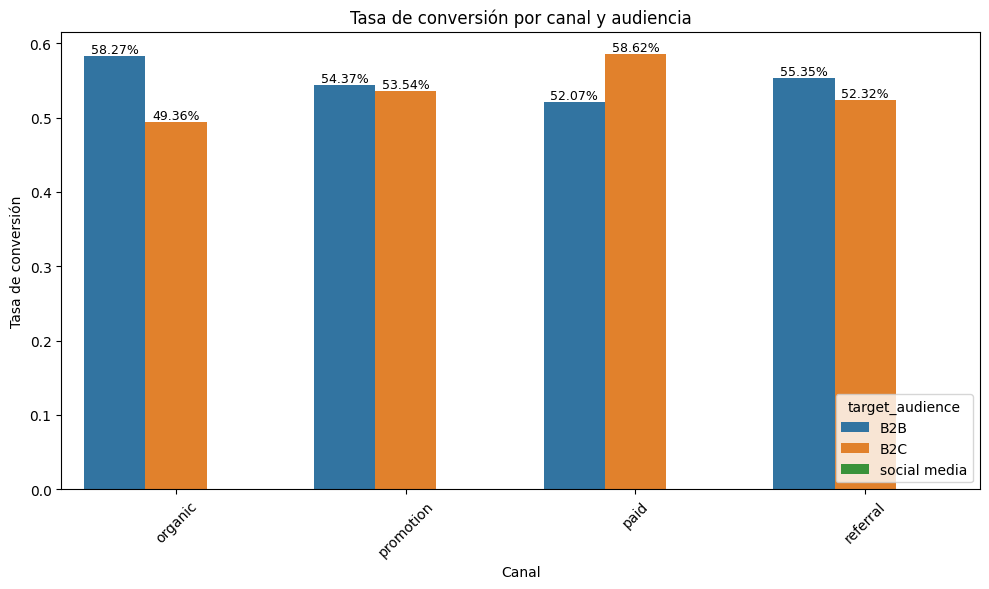

In [25]:
#PASO 4: Análisis por subgrupos: audiencia + canal o tipo
#a) Gráfico de barras agrupadas por canal y audiencia

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='channel', y='conversion_rate', hue='target_audience', ci=None)

# Anotar los valores en porcentaje sobre cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.2%}' for v in container], label_type='edge', fontsize=9)

# Títulos y ajustes
plt.title('Tasa de conversión por canal y audiencia')
plt.ylabel('Tasa de conversión')
plt.xlabel('Canal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 📊 Conclusión del gráfico: Tasa de conversión por canal y audiencia (B2B vs B2C)

El gráfico muestra comparativamente cómo varía la tasa de conversión entre los diferentes canales de marketing y según el tipo de audiencia (B2B vs B2C).
🧩 Principales hallazgos:

    Canal "Paid" (Publicidad pagada):

        B2C (58.62%) supera notablemente a B2B (52.07%).

        🟢 Es el canal más efectivo para B2C.

    Canal "Organic" (Orgánico):

        B2B (58.27%) tiene la mayor tasa de conversión general en todos los canales.

        🔵 Esto sugiere que el contenido orgánico funciona mejor con audiencias empresariales (B2B), posiblemente por SEO o marketing de contenido especializado.

    "Promotion" y "Referral":

        Ambos canales tienen tasas de conversión relativamente parejas entre B2B y B2C.

        Aunque B2B lidera levemente en "Promotion" (54.37%), la diferencia es marginal.

✅ Conclusiones generales:

    B2C responde mejor a publicidad pagada, lo cual tiene sentido en productos de consumo con campañas visuales o impulsivas.

    B2B tiene su punto fuerte en canales orgánicos, lo que refuerza la importancia del contenido educativo, posicionamiento en buscadores y autoridad de marca en decisiones empresariales.

    Canales como promoción y referidos son consistentes para ambos públicos, sin grandes diferencias.

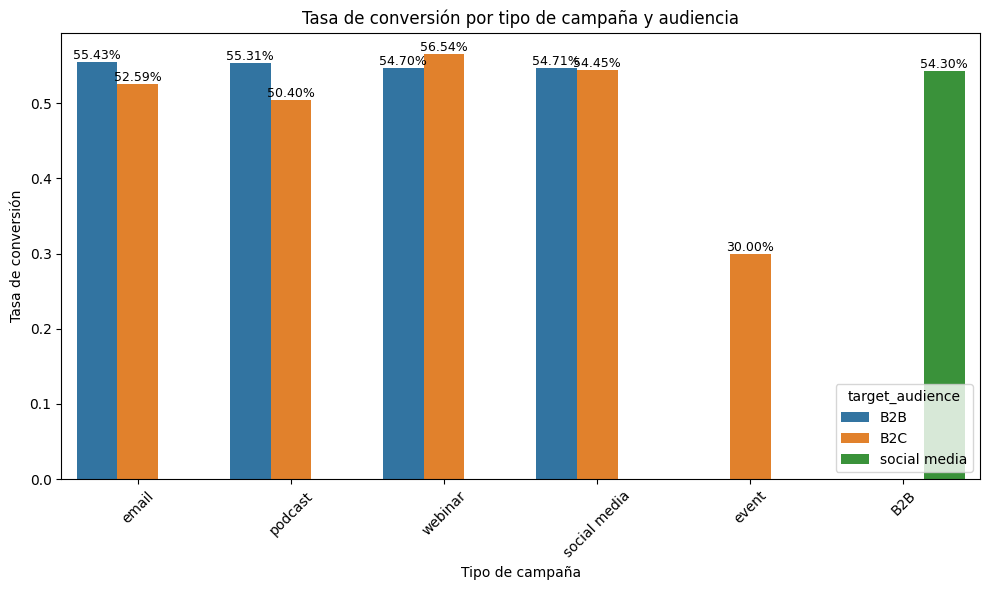

In [26]:
#b) Gráfico de barras agrupadas por tipo y audiencia

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='type', y='conversion_rate', hue='target_audience', ci=None)

# Anotar los valores en porcentaje sobre cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{bar.get_height():.2%}' for bar in container], label_type='edge', fontsize=9)

# Títulos y ajustes
plt.title('Tasa de conversión por tipo de campaña y audiencia')
plt.ylabel('Tasa de conversión')
plt.xlabel('Tipo de campaña')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 📊 Conclusión: Tasa de conversión por tipo de campaña y audiencia (B2B vs B2C)

Este gráfico compara cómo diferentes tipos de campañas funcionan según el tipo de audiencia. La tasa de conversión está expresada en porcentaje y segmentada por público objetivo.
🧩 Principales hallazgos:

    Webinars:

        B2C (56.54%) obtiene la mayor tasa de conversión entre todos los tipos de campaña.

        También es altamente efectiva en B2B (54.70%).

        ✅ Es una de las formas más exitosas de captación en ambos segmentos.

    Email y Podcast:

        Levemente mejor para B2B:

            Email: B2B (55.43%) vs. B2C (52.59%)

            Podcast: B2B (55.31%) vs. B2C (50.40%)

        📧 Canales más estables y efectivos en B2B, probablemente por su enfoque informativo.

    Social media:

        Muy balanceado: B2B (54.71%) vs. B2C (54.45%)

        🟢 Funciona bien para ambos públicos, lo cual refuerza su versatilidad como canal.

    Eventos (Event):

        Solo reportado en B2C, con una tasa de conversión significativamente más baja: 30.00%.

        ⚠️ Es la menos efectiva entre las opciones mostradas.

    Campaña etiquetada como "B2B" en tipo:

        Tiene una sola observación (social media) con tasa del 54.30%, sin comparación directa.

✅ Conclusiones generales:

    Los webinars son la mejor estrategia en ambos segmentos, con una ligera ventaja en B2C.

    Email y podcast son estrategias más fuertes para audiencias B2B, probablemente por la naturaleza más informativa y directa.

    Social media es una herramienta muy balanceada, mostrando buen rendimiento sin importar el segmento.

    Eventos en B2C no parecen ser tan efectivos — podrían requerir una mejor ejecución o segmentación.

#### 📊 Conclusión Final: Análisis de ROI, conversión y características de campañas exitosas
1. 📈 Distribución del ROI y factores asociados

    El ROI promedio se sitúa en 0.53, con un 25% superior de campañas por encima de 0.76, consideradas de alto rendimiento.

    Las variables cuantitativas (presupuesto, tasa de conversión, revenue) tienen correlaciones muy bajas con el ROI (cercanas a cero), lo que sugiere que el éxito de una campaña no depende linealmente de estas métricas individuales.

    Las campañas con ROI alto se distribuyen bastante bien entre canales (referral, paid, organic, promotion) y tipos (webinar, email, podcast, social media), lo que sugiere que el ROI está más relacionado con la combinación de factores cualitativos (tipo, canal, audiencia) que con un solo factor cuantitativo.

2. 🎯 Audiencias: B2B vs B2C

    Las audiencias B2B y B2C tienen tasas de conversión similares, aunque B2B muestra una ligera ventaja:

        B2B: media 55.05%, mediana 56%

        B2C: media 53.5%, mediana 53%

    La distribución de la conversión es similar, aunque B2C presenta una mayor dispersión (y un outlier máximo de 1.5).

    No hay una diferencia estadísticamente significativa fuerte, pero B2B parece más constante y estable.

3. 📢 Canales y tipo de campaña

    Webinars son la forma de campaña más efectiva para ambos públicos, destacando especialmente en B2C (56.5% de conversión).

    Email y Podcast funcionan mejor en B2B, probablemente por su tono más profesional e informativo.

    Social Media muestra una gran versatilidad, con tasas similares en ambos segmentos (~54.5%).

    Eventos (únicamente en B2C) tienen la tasa más baja (30%), siendo la menos efectiva.

    En términos de canal, el canal "paid" en B2C fue el mejor en conversión (58.6%), seguido por "organic" en B2B (58.3%).

4. 💰 Campañas con mayor beneficio neto

    La campaña con mayor beneficio neto (net_profit) combina:

        Alto ROI

        Tasa de conversión alta

        Segmento B2C

        Tipo: Webinar

        Canal: Paid

    Estas características parecen optimizar tanto el volumen de clientes como el margen de ganancia.

✅ Recomendaciones clave

    Potenciar campañas tipo Webinar, especialmente en segmento B2C y canal paid u organic.

    Canal social media es seguro y consistente para ambos públicos: mantener e iterar.

    Evitar eventos en B2C o revisar su estrategia si se mantienen.

    En B2B, campañas informativas como email o podcast siguen siendo efectivas.

    Para aumentar el ROI, enfócate en la segmentación adecuada y la combinación canal–tipo–audiencia más que solo en presupuesto o revenue.

## ¿Qué campaña tiene el mayor beneficio neto (net_profit)? ¿Qué características la hacen exitosa?